In [1]:
# import stuff
#General
import importlib

#My Code
import io_manager as io
import plot_aggregates
from pars_shocks import Pars
import my_toolbox as tb
import my_tables as tables  
import main
import numpy as np
import model_uncert as model
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import pars_shocks as ps

import time
import main
import importlib
importlib.reload(main)
importlib.reload(tb)

of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
path_50p = main_path + "input/50p_age_moms/"
trans_uncond_path = path_50p + "MH_trans_uncond_age.csv"
do_phi_H_calib = False
myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path=trans_uncond_path, do_dpi_calib = do_phi_H_calib)
myPars = myPars_bench

*****Running main_io with default out_folder_name*****
Solver ran in 9.91649630000029 seconds
Calibrating with alpha_lab_targ = 0.33495033, w0_mean_targ = 2.1986368, w0_sd_targ = 0.29955208, 
                                        w1_targ = 0.2915730000000001, w2_targ = 0.2731836000000003, wH_targ = 0.051262233,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 4 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 5 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iterat

In [2]:
import main
import calibration as calib
import pars_shocks as ps
import importlib
import plot_lc
importlib.reload(main)
importlib.reload(calib)
importlib.reload(plot_lc)

print(f"trans_path: {trans_uncond_path}")

of_name = None

myPars_no_wH: Pars = main.pars_factory(main_path, H_trans_uncond_path = trans_uncond_path)
myPars_no_wH.wH_coeff = 0.0
myPars_no_wH, myShocks_no_wH, sols_no_wH, sims_no_wH = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_uncond_path,
                                                                    myPars = myPars_no_wH, myShocks=myShocks_bench, 
                                                                    output_flag = False, do_wH_calib = False, do_dpi_calib = False)

myPars_all_high_H_types: Pars = main.pars_factory(main_path, H_trans_uncond_path = trans_uncond_path)
myPars_all_high_H_types.H_type_perm_weights = np.array([0.0, 1.0])
(myPars_all_high_H_types, myShocks_all_high_H_types, 
    sols_all_high_H_types, sims_all_high_H_types) = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_uncond_path,
                                                                    myPars = myPars_all_high_H_types, myShocks=myShocks_bench, 
                                                                    output_flag = False, do_dpi_calib=False)
print("myPars_bench")
print(f"phi_H: {myPars_bench.phi_H}, wH_coeff: {myPars_bench.wH_coeff}, H_type_perm_weights: {myPars_bench.H_type_perm_weights}")
print("myPars_no_wH")
print(f"phi_H: {myPars_no_wH.phi_H}, wH_coeff: {myPars_no_wH.wH_coeff}, H_type_perm_weights: {myPars_no_wH.H_type_perm_weights}")
print("myPars_all_high_H_types")
print(f"phi_H: {myPars_all_high_H_types.phi_H}, wH_coeff: {myPars_all_high_H_types.wH_coeff}, H_type_perm_weights: {myPars_all_high_H_types.H_type_perm_weights}")

trans_path: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/50p_age_moms/MH_trans_uncond_age.csv
*****Running main_io with default out_folder_name*****
Solver ran in 0.5650564999996277 seconds
Calibrating with alpha_lab_targ = 0.33495033, w0_mean_targ = 2.1986368, w0_sd_targ = 0.29955208, 
                                        w1_targ = 0.2915730000000001, w2_targ = 0.2731836000000003, wH_targ = 0.051262233,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 2 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 4 *****
Calibrating w0_

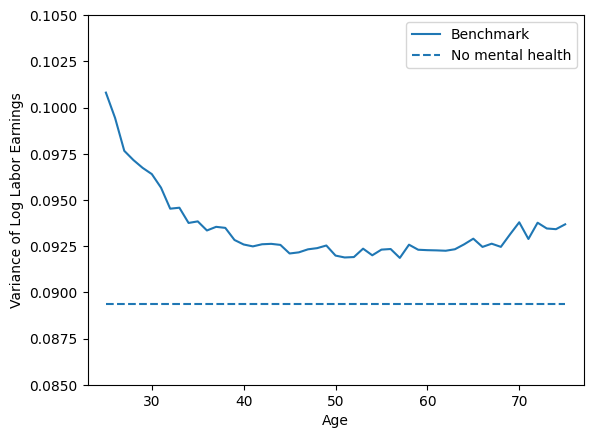

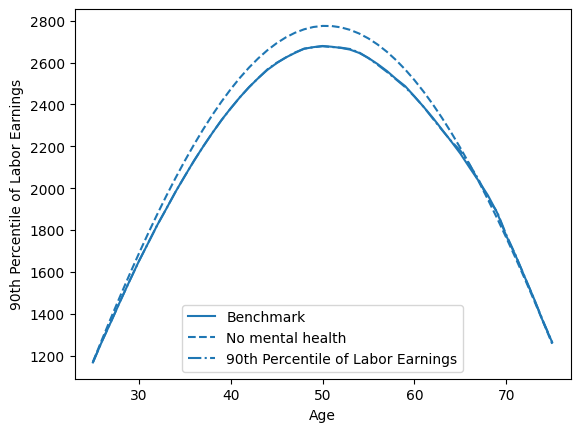

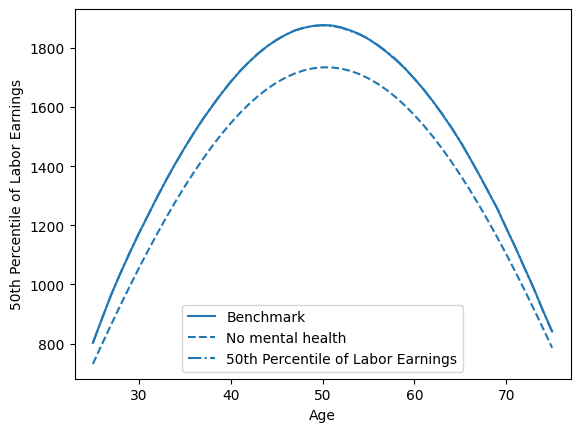

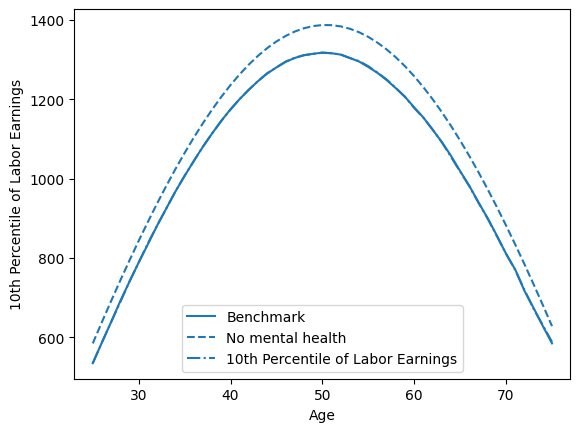

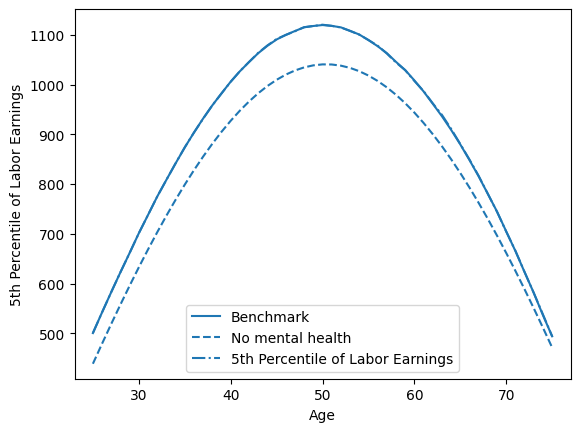

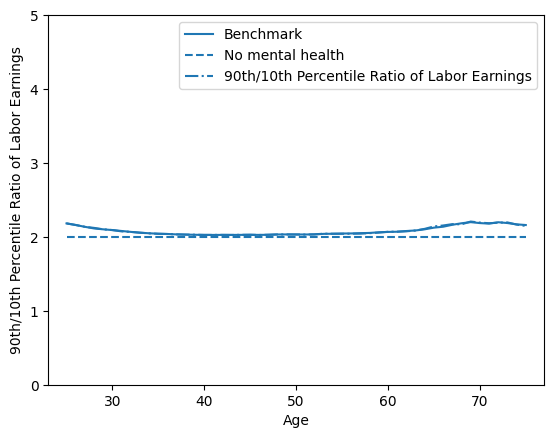

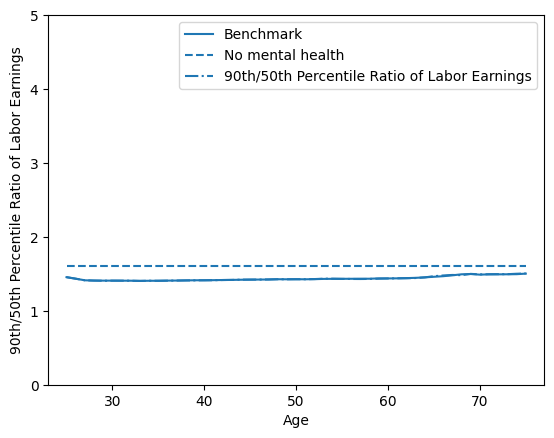

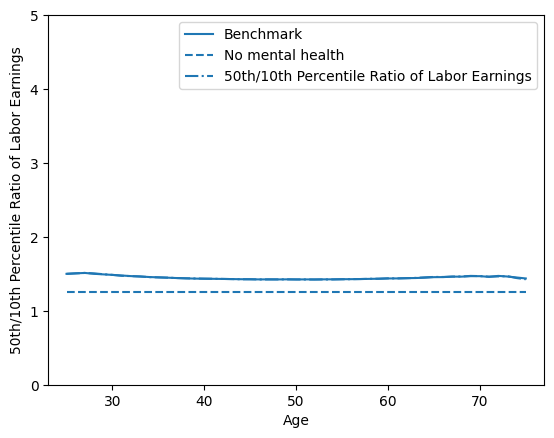

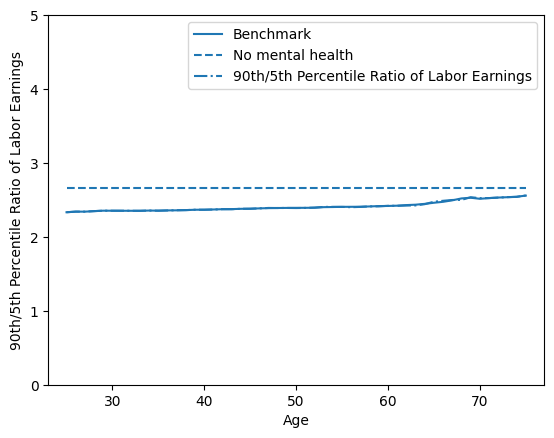

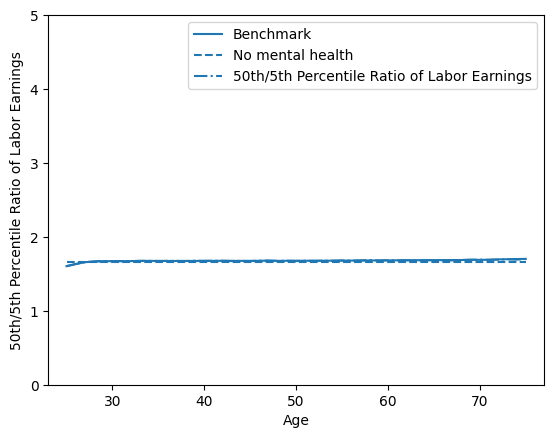

In [3]:
import plot_inequality as plot_ineq
import matplotlib
importlib.reload(tb)
importlib.reload(plot_ineq)

outpath = main_path + "validation/"
quietly = True
full_age_grid = True
y_label_root = "Labor Earnings"
y_axis_label_var = "Variance of Log" + " " + y_label_root
my_label_lists = [["Benchmark"], ["No mental health"]]

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench, sims_bench["lab_earnings"], y_axis_label_var,
                                                                 outpath = outpath, quietly = quietly, full_age_grid = full_age_grid)

fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH["lab_earnings"], y_axis_label_var, 
                                                        outpath = outpath, quietly = quietly, full_age_grid = full_age_grid)

fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types["lab_earnings"], y_axis_label_var, 
                                                                               outpath =outpath, quietly = quietly, full_age_grid = full_age_grid)

bench_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_bench, sims_bench["lab_earnings"], y_label_root, outpath, 
                                                          quietly = quietly, full_age_grid = full_age_grid)
no_wH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_wH, sims_no_wH["lab_earnings"], y_label_root, outpath, 
                                                          quietly = quietly, full_age_grid = full_age_grid)
all_high_H_types_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_all_high_H_types, sims_all_high_H_types["lab_earnings"], y_label_root, outpath, 
                                                                     quietly = quietly, full_age_grid = full_age_grid)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
plot_save_path = outpath + "fig_log_earn_counter_var" + ".pdf"
combined_plot_list = []

y_lim = [0.085,0.105]
fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark),(fig_var_no_wH, ax_var_no_wH)], 
                    save_path = plot_save_path, label_lists = my_label_lists, quietly = False, y_lim = y_lim)
y_lim_percentile = [0.0, 5.0]

for i in range(len(bench_perc_plot_list)):
    plot_save_path = outpath + f"fig_earn_counter{i}.pdf"
    my_y_lim = None
    if i > 3:
        my_y_lim = y_lim_percentile
    combined_plot_list.append(tb.combine_plots([bench_perc_plot_list[i], no_wH_perc_plot_list[i], all_high_H_types_perc_plot_list[i]], 
                    save_path = plot_save_path, y_lim = my_y_lim, label_lists = my_label_lists, quietly = False))

plt.close("all")

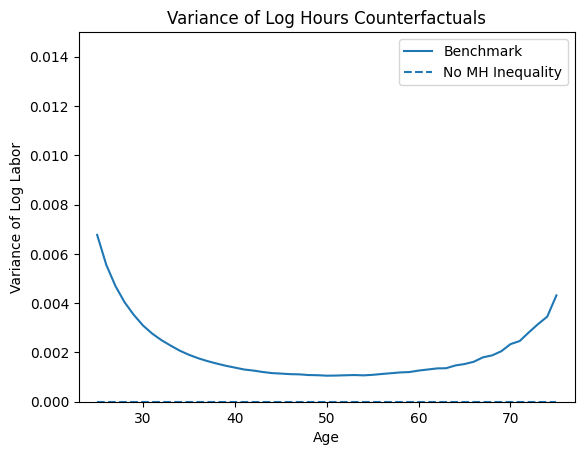

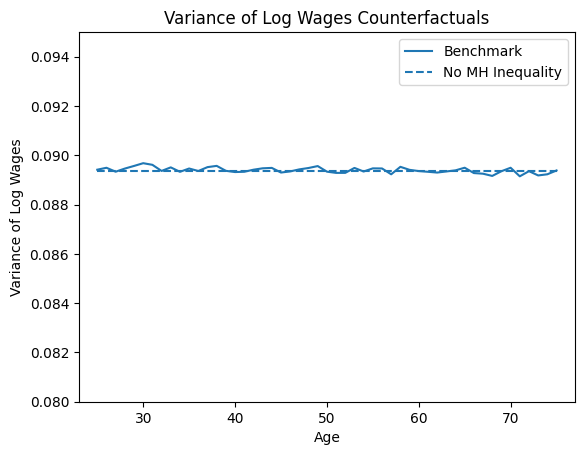

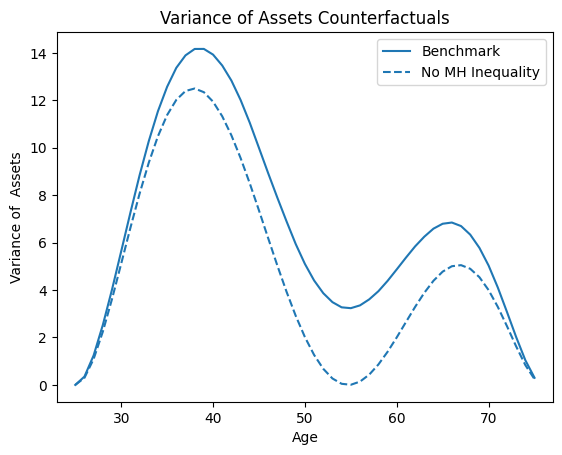

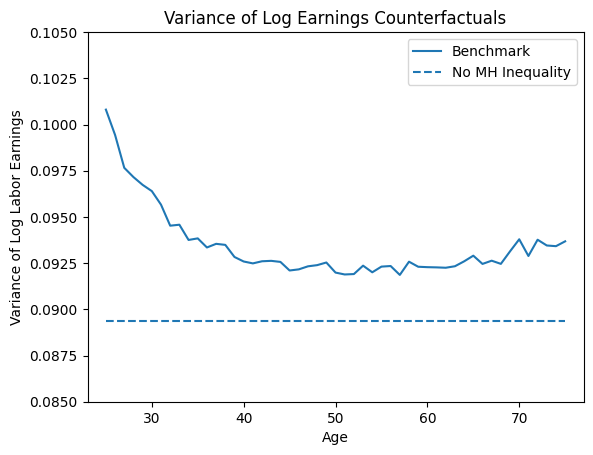

In [4]:
# gen the variance counter factual plot for log hours and log wages
import plot_inequality as plot_ineq
import matplotlib
importlib.reload(tb)
importlib.reload(plot_ineq)

outpath = main_path + "validation/"
quietly = True

# my_label_lists =[["Benchmark"], ["No mental health"], ["All high type"]]
my_label_lists =[["Benchmark"], ["No MH Inequality"]]

y_label_root = "Labor"
y_axis_label_var = "Variance of Log" + " " + y_label_root
var = "lab"

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,sims_bench[var], y_axis_label_var, outpath =outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH[var], y_axis_label_var, outpath =outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types[var], y_axis_label_var,outpath = outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_log_hours_counter_var" + ".pdf"
y_lim = [0.0, 0.015]
combined_title = "Variance of Log Hours Counterfactuals"

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), (fig_var_no_wH, ax_var_no_wH)], 
                            comb_fig_title = combined_title, y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

y_label_root = "Wages"
y_axis_label_var = "Variance of Log" + " " + y_label_root

wages_bench = model.gen_wage_hist(myPars_bench, myShocks_bench)
wages_no_wH = model.gen_wage_hist(myPars_no_wH, myShocks_no_wH)
wages_all_high_H_types = model.gen_wage_hist(myPars_all_high_H_types, myShocks_all_high_H_types)

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,wages_bench, y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, wages_no_wH, y_axis_label_var, outpath =outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, wages_all_high_H_types, y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_log_wages_counter_var" + ".pdf"
y_lim = [0.08, 0.095]
combined_title = "Variance of Log Wages Counterfactuals"
fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), (fig_var_no_wH, ax_var_no_wH)],
                  comb_fig_title = combined_title, y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

var = "a"
y_label_root = "Assets"
y_axis_label_var = "Variance of " + " " + y_label_root

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_sim(myPars_bench,sims_bench[var], y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_sim(myPars_no_wH, sims_no_wH[var], y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_sim(myPars_all_high_H_types, sims_all_high_H_types[var], y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_assets_counter_var" + ".pdf"
y_lim = None 
combined_title = "Variance of Assets Counterfactuals"

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), (fig_var_no_wH, ax_var_no_wH)], 
                    comb_fig_title = combined_title, y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

y_label_root = "Labor Earnings"
y_axis_label_var = "Variance of Log" + " " + y_label_root
var = "lab_earnings"

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,sims_bench[var], y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH[var], y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types[var], y_axis_label_var, outpath = outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_log_earn_counter_var" + ".pdf"
# y_lim = [0.135, 0.15] 
y_lim = [0.085,0.105]
combined_title = "Variance of Log Earnings Counterfactuals"

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), (fig_var_no_wH, ax_var_no_wH)], 
                    comb_fig_title = combined_title, y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

mean earns_data_75_25: 2.1124480958669247
mean p25 924.252498653846
mean p75 1913.9832692307693
mean 75 / mean 25: 2.0708445711734025


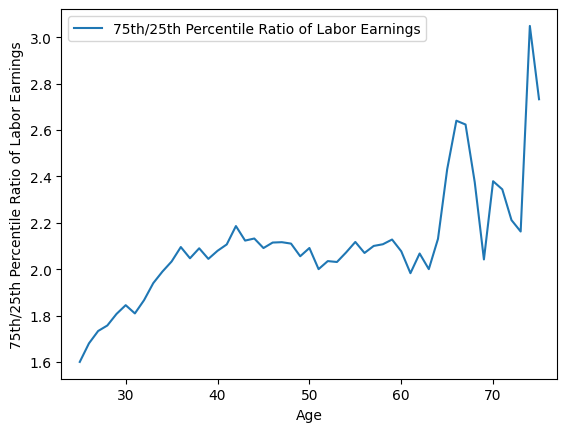

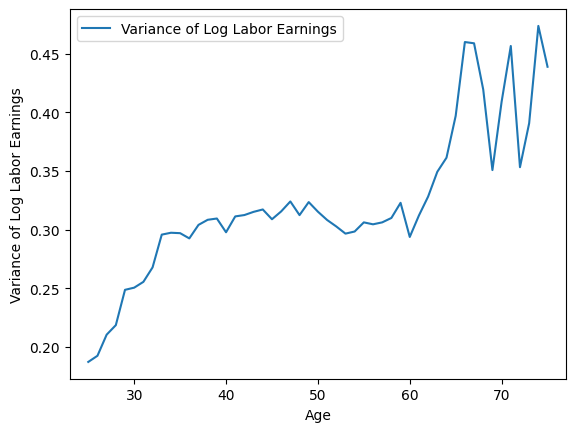

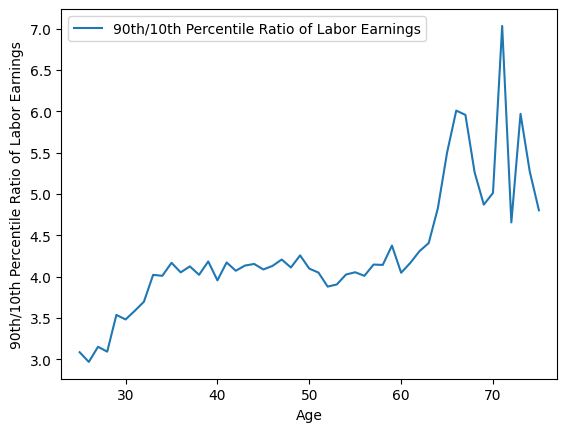

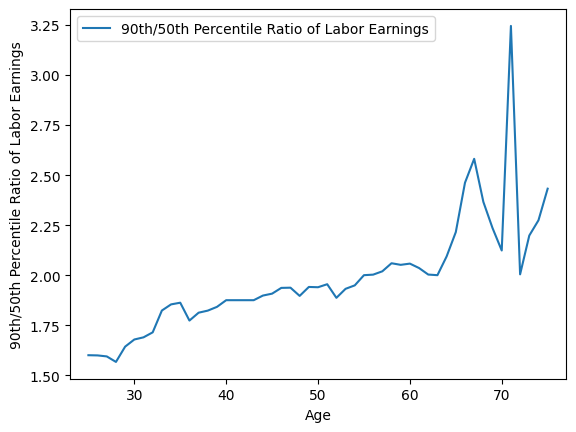

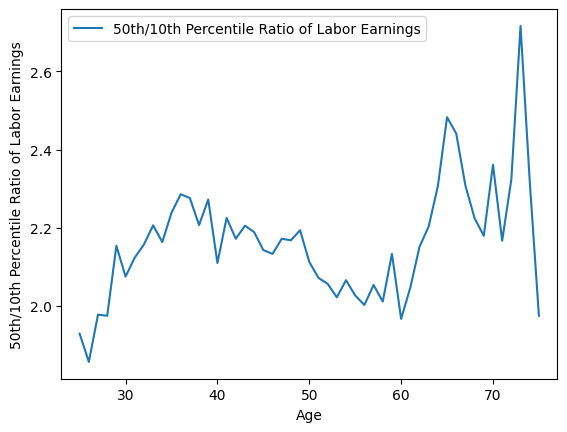

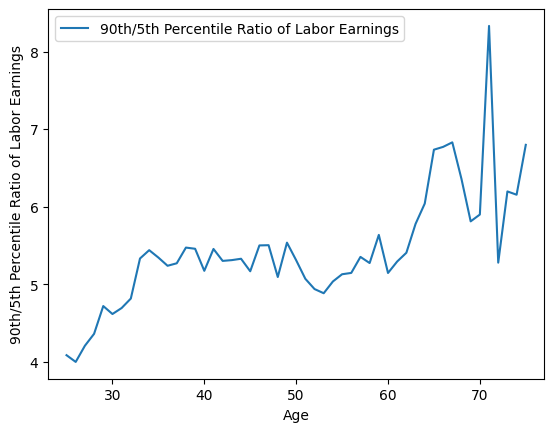

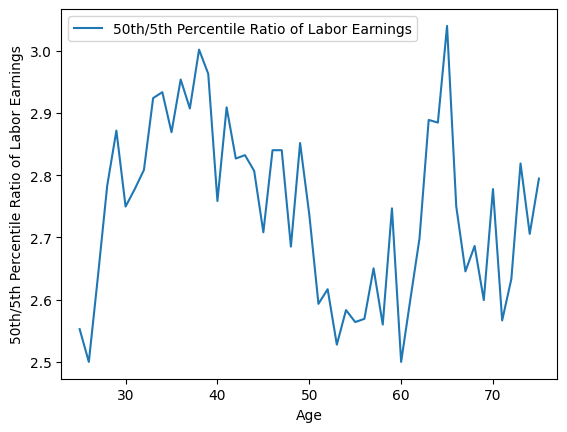

In [ ]:
import pandas as pd
input_path = main_path + "input/50p_age_moms/"
plot_save_path = main_path + "validation/" + "validating_var_earn" + ".pdf"
quietly = False

var_data = pd.read_csv(input_path + "var_earn_moments.csv")
var_data.columns = ["age", "var_earnings"]
perc_data = pd.read_csv(input_path + "earn_percentiles.csv")
perc_data.columns = ["age", "p5", "p10", "p25", "p50", "p75", "p90", "p95"]
# drop the first row
perc_data = perc_data.drop(0)

var_earns_data = var_data["var_earnings"].to_numpy()
earns_data_5p = perc_data["p5"].to_numpy()
earns_data_10p = perc_data["p10"].to_numpy()
earns_data_25p = perc_data["p25"].to_numpy()
earns_data_50p = perc_data["p50"].to_numpy()
earns_data_75p = perc_data["p75"].to_numpy()
earns_data_90p = perc_data["p90"].to_numpy()
earns_data_95p = perc_data["p95"].to_numpy()

earns_data_90_10 = earns_data_90p/earns_data_10p
earns_data_90_50 = earns_data_90p/earns_data_50p
earns_data_50_10 = earns_data_50p/earns_data_10p
earns_data_90_5 = earns_data_90p/earns_data_5p
earns_data_50_5 = earns_data_50p/earns_data_5p
earns_data_75_25 = earns_data_75p/earns_data_25p


print(f"mean earns_data_75_25: {np.mean(earns_data_75_25)}")
print(f"mean p25", np.mean(earns_data_25p))
print(f"mean p75", np.mean(earns_data_75p))
print(f'mean 75 / mean 25: {np.mean(earns_data_75p)/np.mean(earns_data_25p)}')

# my_age_grid = myPars_bench.age_grid[:31] # only want to plot up to age 55
my_age_grid = myPars_bench.age_grid

fig_earns_data_75_25, ax_earns_data_75_25 = tb.plot_lc_mom_by_age(earns_data_75_25, my_age_grid,
                                                                    mom_name = "75th/25th Percentile Ratio of Labor Earnings",
                                                                    quietly = quietly)

fig_var_earns_data, ax_var_earns_data =tb.plot_lc_mom_by_age(var_earns_data, my_age_grid,  
                                                             mom_name = "Variance of Log Labor Earnings" , 
                                                             quietly = quietly)
fig_earns_data_90_10, ax_earns_data_90_10 = tb.plot_lc_mom_by_age(earns_data_90_10, my_age_grid,  
                                                                 mom_name = "90th/10th Percentile Ratio of Labor Earnings",
                                                                   quietly = quietly)
fig_earns_data_90_50, ax_earns_data_90_50 = tb.plot_lc_mom_by_age(earns_data_90_50, my_age_grid, 
                                                                    mom_name = "90th/50th Percentile Ratio of Labor Earnings",
                                                                    quietly = quietly)
fig_earns_data_50_10, ax_earns_data_50_10 = tb.plot_lc_mom_by_age(earns_data_50_10, my_age_grid, 
                                                                    mom_name = "50th/10th Percentile Ratio of Labor Earnings",
                                                                    quietly = quietly)
fig_earns_data_90_5, ax_earns_data_90_5 = tb.plot_lc_mom_by_age(earns_data_90_5, my_age_grid, 
                                                                mom_name = "90th/5th Percentile Ratio of Labor Earnings",
                                                                quietly = quietly)
fig_earns_data_50_5, ax_earns_data_50_5 = tb.plot_lc_mom_by_age(earns_data_50_5, my_age_grid, 
                                                                mom_name = "50th/5th Percentile Ratio of Labor Earnings",
                                                                quietly = quietly)





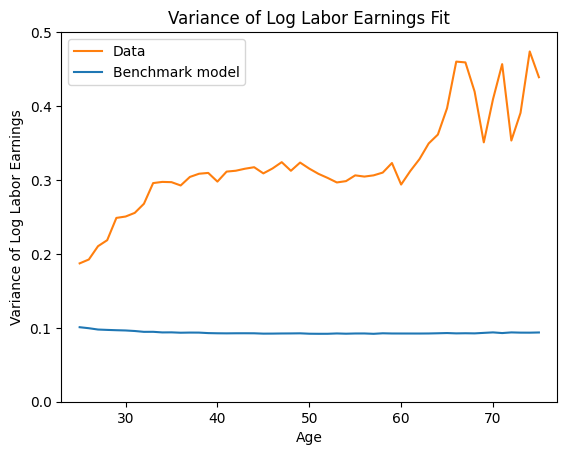

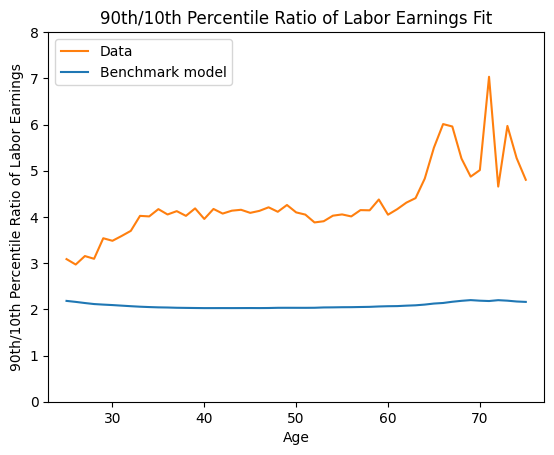

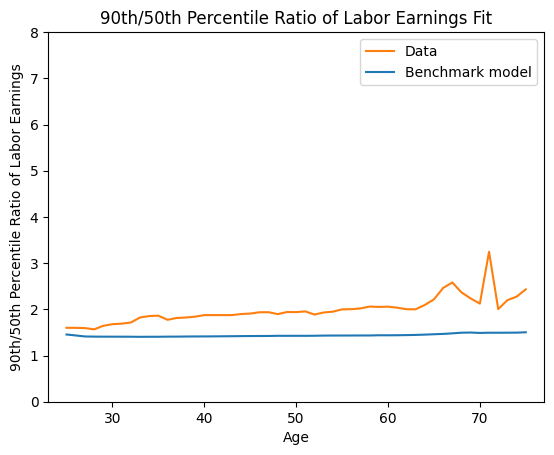

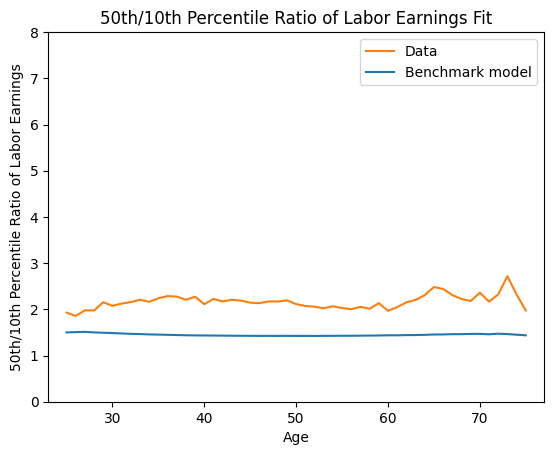

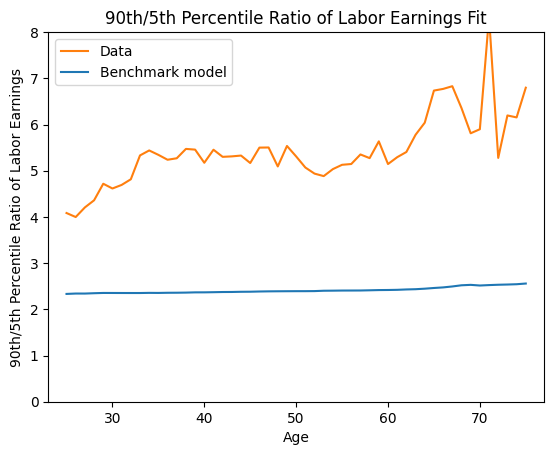

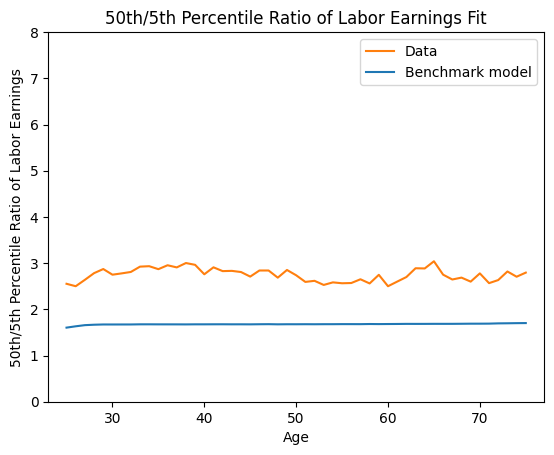

In [6]:
importlib.reload(tb)
plt.ioff()
quietly = False
label_lists = [["Data"], ["Benchmark model"]]
percentile_y_lim = [0.0, 8.0]
line_colors = ["C1", "C0"] # these are the standard matplotlib colors
plot_save_path = main_path + "validation/" + "validating_earn" 

fig_title = "Variance of Log Labor Earnings Fit"
fig_valid_lab_earn, ax_valid_lab_earn = tb.combine_plots([(fig_var_earns_data, ax_var_earns_data), 
                                                            (fig_var_benchmark, ax_var_benchmark)], comb_fig_title = fig_title,
                                                            save_path = plot_save_path + "_var" + ".pdf", y_lim = [0.0, 0.5],
                                                            label_lists = label_lists, colors = line_colors, quietly = quietly)
fig_title = "90th/10th Percentile Ratio of Labor Earnings Fit"
fig_valid_lab_earn_90_10, ax_valid_lab_earn_90_10 = tb.combine_plots([(fig_earns_data_90_10, ax_earns_data_90_10),
                                                                    bench_perc_plot_list[4]], comb_fig_title = fig_title, 
                                                                    save_path = plot_save_path + "_90_10" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists, 
                                                                    colors = line_colors, quietly = quietly)

fig_title = "90th/50th Percentile Ratio of Labor Earnings Fit"
fig_valid_lab_earn_90_50, ax_valid_lab_earn_90_50 = tb.combine_plots([(fig_earns_data_90_50, ax_earns_data_90_50),
                                                                    bench_perc_plot_list[5]], comb_fig_title = fig_title,
                                                                    save_path = plot_save_path + "_90_50" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists, 
                                                                    colors = line_colors, quietly = quietly)

fig_title = "50th/10th Percentile Ratio of Labor Earnings Fit"
fig_valid_lab_earn_50_10, ax_valid_lab_earn_50_10 = tb.combine_plots([(fig_earns_data_50_10, ax_earns_data_50_10),
                                                                    bench_perc_plot_list[6]], comb_fig_title= fig_title,
                                                                    save_path = plot_save_path + "_50_10" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists,
                                                                    colors = line_colors, quietly = quietly)

fig_title = "90th/5th Percentile Ratio of Labor Earnings Fit"
fig_valid_lab_earn_90_5, ax_valid_lab_earn_90_5 = tb.combine_plots([(fig_earns_data_90_5, ax_earns_data_90_5),
                                                                    bench_perc_plot_list[7]], comb_fig_title = fig_title,
                                                                    save_path = plot_save_path + "_90_5" + ".pdf",
                                                                    y_lim = percentile_y_lim,label_lists = label_lists,     
                                                                    colors = line_colors, quietly = quietly)

fig_title = "50th/5th Percentile Ratio of Labor Earnings Fit"
fig_valid_lab_earn_50_5, ax_valid_lab_earn_50_5 = tb.combine_plots([(fig_earns_data_50_5, ax_earns_data_50_5),
                                                                    bench_perc_plot_list[8]], comb_fig_title = fig_title,
                                                                    save_path = plot_save_path + "_50_5" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists,
                                                                    colors = line_colors, quietly = quietly)

In [7]:

def weight_devs2(myPars: Pars, devs2: np.ndarray) -> np.ndarray:
    wdevs = devs2 * (1.0/myPars.sim_draws)
    wdevs = wdevs * myPars.H_type_perm_weights[np.newaxis, :, np.newaxis]
    wdevs = wdevs *  myPars.lab_fe_weights[:, np.newaxis, np.newaxis]
    return wdevs